# Support Vector Machines Homework

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from scipy.cluster import hierarchy


# Create a standard scaler for scaling data
standard_scaler = StandardScaler()

# Load the breasr cancer dataset
cancer = load_breast_cancer()

# Create a dataframe from the breast cancer data
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df['outcome'] = cancer.target

# Get the features and targets from the dataframe
X = cancer.data
y = cancer.target

# Scale X and split data into train and test data
scaled_X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

## Without Multicollinearity

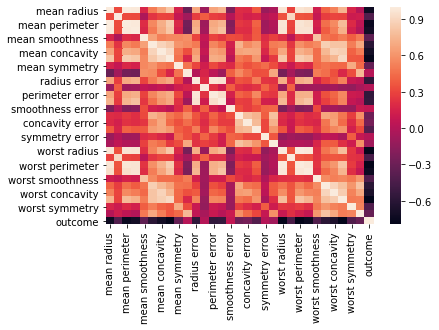

In [2]:
# Corrilation Heatmap without checking for mutlicollinearity
sn.heatmap(df.corr())
plt.show()

In [3]:
from sklearn.svm import SVC

log_svm = SVC(kernel='sigmoid')
log_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
y_pred = log_svm.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

0.04895104895104895
0.784731182795699


## With Multicollinearity

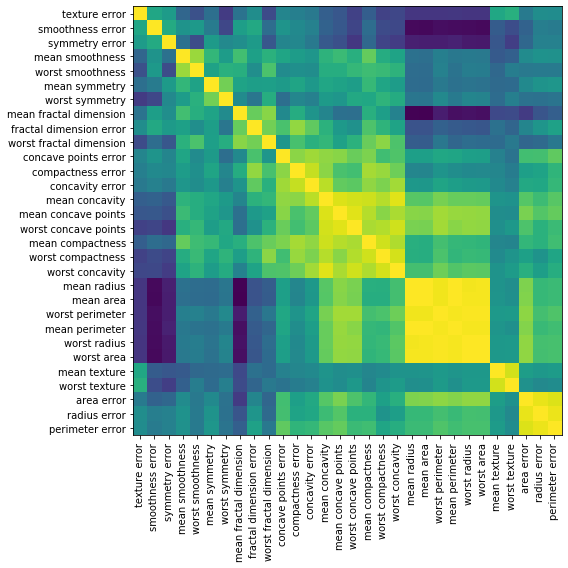

In [5]:
# Corrilation heatmap with checking for mutlicollinearity
fig, (ax1) = plt.subplots(1, figsize=(12, 8))
corr = spearmanr(scaled_X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=cancer.feature_names, ax=ax1, leaf_rotation=90, no_plot=True)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax1.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro['ivl'], rotation='vertical')
ax1.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [6]:
from sklearn.svm import SVC
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

log_svm = SVC(kernel='sigmoid')
log_svm.fit(X_train_sel, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = log_svm.predict(X_test_sel)

print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

0.08391608391608392
0.6342710997442454
